In [1]:
%matplotlib inline
import os
import glob
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, StratifiedKFold

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
# get data file names
path = r'D:/DS/aspiration.ai/MOD6'
filenames = glob.glob(path + "/*.csv")
cp_list = []

In [74]:
filenames

['D:/DS/aspiration.ai/MOD6\\ASHOKA.csv',
 'D:/DS/aspiration.ai/MOD6\\CIPLA.csv',
 'D:/DS/aspiration.ai/MOD6\\DHFL.csv',
 'D:/DS/aspiration.ai/MOD6\\FORTIS.csv',
 'D:/DS/aspiration.ai/MOD6\\GAIL.csv',
 'D:/DS/aspiration.ai/MOD6\\HDFC.csv',
 'D:/DS/aspiration.ai/MOD6\\HINDALCO.csv',
 'D:/DS/aspiration.ai/MOD6\\IDBI.csv',
 'D:/DS/aspiration.ai/MOD6\\IDFC.csv',
 'D:/DS/aspiration.ai/MOD6\\IGL.csv',
 'D:/DS/aspiration.ai/MOD6\\INFRATEL.csv',
 'D:/DS/aspiration.ai/MOD6\\INFY.csv',
 'D:/DS/aspiration.ai/MOD6\\IOC.csv',
 'D:/DS/aspiration.ai/MOD6\\IRCON.csv',
 'D:/DS/aspiration.ai/MOD6\\ITC.csv',
 'D:/DS/aspiration.ai/MOD6\\JETAIRWAYS.csv',
 'D:/DS/aspiration.ai/MOD6\\LT.csv',
 'D:/DS/aspiration.ai/MOD6\\LUXIND.csv',
 'D:/DS/aspiration.ai/MOD6\\MINDTREE.csv',
 'D:/DS/aspiration.ai/MOD6\\MRPL.csv',
 'D:/DS/aspiration.ai/MOD6\\NBCC.csv',
 'D:/DS/aspiration.ai/MOD6\\NCC.csv',
 'D:/DS/aspiration.ai/MOD6\\PNB.csv',
 'D:/DS/aspiration.ai/MOD6\\PVR.csv',
 'D:/DS/aspiration.ai/MOD6\\RAYMOND.csv',
 'D:

In [75]:
tickers = ['ASHOKA', 'CIPLA', 'DHFL', 'FORTIS', 'GAIL', 'HDFC', 'HINDALCO', 'IDBI', 'IDFC', 'IGL', 'INFRATEL'\
          ,'INFY', 'IOC', 'IRCON', 'ITC', 'JETAIRWAYS', 'LT', 'LUXIND', 'MINDTREE', 'MRPL', 'NBCC', 'NCC', 'PNB'\
          ,'PVR', 'RAYMOND', 'RCOM', 'SUNTV', 'TATACHEM', 'TITAN', 'VOLTAS']

In [107]:
t = pd.read_csv(filenames[0])['Close Price']
t = pd.DataFrame(t)
t.rename(columns={'Close Price': 'WTF'}, inplace=True)
t.head()

,WTF
0,216.05
1,214.90
2,217.00
3,209.65
4,206.25


In [114]:
cp_list = []
for filename in filenames:
    cp = pd.read_csv(filename)['Close Price']
    new_name = filename[25:len(filename)-4]
    cp = pd.DataFrame(cp)
    cp.rename(columns={'Close Price': new_name}, inplace=True)
    cp_list.append(cp)
    cp_df = pd.concat(cp_list,axis=1)

In [115]:
cp_df.sort_index(inplace=True)
cp_df.head()

,ASHOKA,CIPLA,DHFL,FORTIS,GAIL,HDFC,HINDALCO,IDBI,IDFC,IGL,...,NBCC,NCC,PNB,PVR,RAYMOND,RCOM,SUNTV,TATACHEM,TITAN,VOLTAS
0,216.05,569.00,431.4,205.25,414.00,1559.50,198.45,75.05,63.70,1000.25,...,197.60,97.35,166.80,1524.95,772.80,32.00,912.20,629.80,483.65,431.85
1,214.90,565.60,1009.9,207.90,411.40,205.00,196.50,76.65,64.25,1005.80,...,198.25,100.40,174.15,1539.00,785.00,32.10,894.70,643.90,488.30,432.45
2,217.00,562.35,1055.2,205.90,408.30,1566.55,198.85,75.95,63.35,1019.10,...,200.35,101.45,165.05,1530.30,783.65,31.95,887.05,638.10,481.75,430.20
3,209.65,560.10,1070.0,196.85,404.75,1552.50,194.00,69.95,61.50,1002.55,...,194.20,97.00,158.50,1515.05,746.95,31.05,871.35,624.90,471.65,414.10
4,206.25,564.95,1050.0,203.55,401.05,207.00,191.00,68.75,61.15,1000.15,...,193.55,95.45,155.20,1513.55,723.10,30.55,852.40,616.45,471.15,415.75


In [116]:
cp_df.shape

(4792, 30)

In [117]:
pandas_profiling.ProfileReport(cp_df)

Number of variables,30
Number of observations,4792
Total Missing (%),77.7%
Total size in memory,1.1 MiB
Average record size in memory,240.0 B
Numeric,27
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,3


In [130]:
returns = cp_df.pct_change().mean() * 252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns['Volatility'] = cp_df.pct_change().std() * np.sqrt(252)

In [131]:
returns.head()

,Returns,Volatility
ASHOKA,-0.021456,0.142025
CIPLA,0.001216,0.081551
DHFL,37.291356,14.007242
FORTIS,-0.015005,0.135161
GAIL,-0.005408,0.108466


In [132]:
returns.shape

(30, 2)

In [137]:
cp_df_new = cp_df.dropna()

In [139]:
ssd = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(cp_df_new)
    ssd.append(km.inertia_)

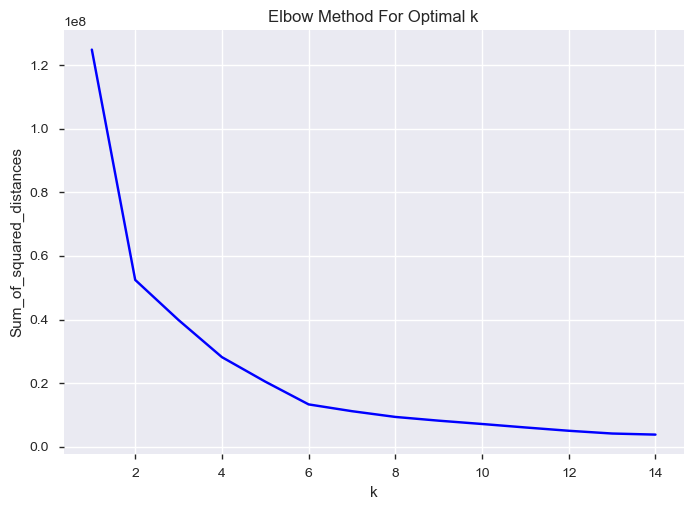

In [140]:
plt.plot(K, ssd, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Elbow is at K = 4

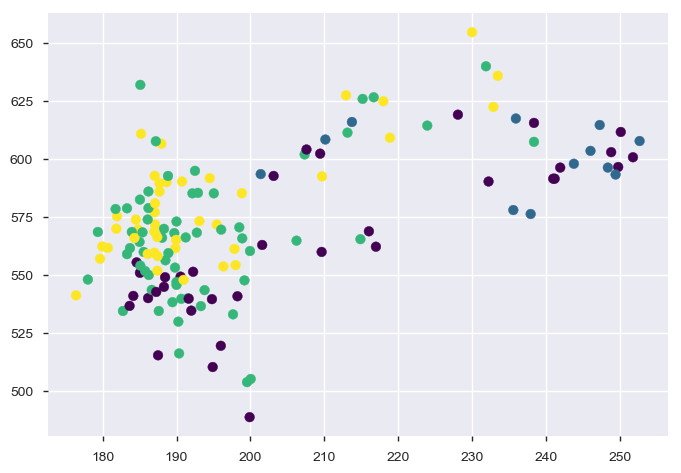

In [147]:
X = cp_df_new.values
kmeans = KMeans(n_clusters = 4).fit(X)
centroids = kmeans.cluster_centers_
plt.scatter(X[:,0], X[:,1], c = kmeans.labels_, cmap ="viridis")
plt.show()